In [1]:
#Pull historical and simulated files for periods of interest, trim to location of interest

In [2]:
import numpy as np
import pandas as pd
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
import xoak

In [3]:
import sklearn

In [4]:
historical_path= "/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test"
future_dir="/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/gcm-forcing"
output_repo="."
ref_clim_per=[1990,2019]
fut_clim_per=[2028,2057]

In [5]:
# for precipitation, look at 1990-2019 and then 2028:2057

In [6]:
var='prec' #varible interest string
#for 
thisy='1990'

In [7]:
completestr=historical_path+"/"+var+'_3hr_'+thisy+'.nc'
test1=xr.open_dataset(completestr)

In [8]:
test1

<xarray.Dataset> Size: 175MB
Dimensions:  (day: 366, south_north: 492, west_east: 243)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1990-10-01 1990-10-02 ... 1991-10-01
Dimensions without coordinates: south_north, west_east
Data variables:
    prec     (day, south_north, west_east) float32 175MB ...
Attributes:
    Units:    mm/day

In [9]:
#test1=test1.assign_coords({"sn":test1.south_north})
test1=test1.assign_coords({"we":test1.west_east})
test1

<xarray.Dataset> Size: 175MB
Dimensions:  (day: 366, south_north: 492, west_east: 243)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1990-10-01 1990-10-02 ... 1991-10-01
    we       (west_east) int64 2kB 0 1 2 3 4 5 6 ... 236 237 238 239 240 241 242
Dimensions without coordinates: south_north, west_east
Data variables:
    prec     (day, south_north, west_east) float32 175MB ...
Attributes:
    Units:    mm/day

In [10]:
# test1.sel(sn=1,we=1)

In [11]:
np.array(test1.south_north)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
# output1=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/cape.daily.mpi-esm1-2-hr.r3i1p1f1.ssp370.d01.2014.nc")

In [13]:
output1=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/supplemental_files/AWS/EC-Earth3-Veg/historical/r1i1p1f1/Processed_Runoff_Output/RNFRATE_24hr_r1i1p1f1_1958.nc")
output1

<xarray.Dataset> Size: 176MB
Dimensions:      (day: 365, west_east: 243, south_north: 492)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
  * west_east    (west_east) int64 2kB 0 1 2 3 4 5 6 ... 237 238 239 240 241 242
  * south_north  (south_north) int64 4kB 0 1 2 3 4 5 ... 486 487 488 489 490 491
    XLONG        (south_north, west_east) float32 478kB ...
    XTIME        datetime64[ns] 8B ...
    XLAT         (south_north, west_east) float32 478kB ...
Data variables:
    RNFRATE      (day, south_north, west_east) float32 175MB ...

In [14]:
#try out xoak
#example from docs:ds_mesh.xoak.set_index(['lat', 'lon'], 'sklearn_geo_balltree')
#output1.xoak.set_index(['XLAT','XLONG'],'scipy_kdtree') #trty alternate engine used in this example https://pop-tools.readthedocs.io/en/latest/examples/xoak-example.html
output1.xoak.set_index(['XLAT','XLONG'],'sklearn_geo_balltree')
print(output1)

<xarray.Dataset> Size: 176MB
Dimensions:      (day: 365, west_east: 243, south_north: 492)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
  * west_east    (west_east) int64 2kB 0 1 2 3 4 5 6 ... 237 238 239 240 241 242
  * south_north  (south_north) int64 4kB 0 1 2 3 4 5 ... 486 487 488 489 490 491
    XLONG        (south_north, west_east) float32 478kB -117.8 -117.8 ... -120.8
    XTIME        datetime64[ns] 8B ...
    XLAT         (south_north, west_east) float32 478kB 29.98 29.99 ... 44.9
Data variables:
    RNFRATE      (day, south_north, west_east) float32 175MB ...


In [15]:
output1.xoak.index

In [16]:
ds_points=xr.Dataset({
    'latitude':('point',np.linspace(36,38,10)),
    'longitude':('point',np.linspace(-123,-122,10))
})
ds_points

<xarray.Dataset> Size: 160B
Dimensions:    (point: 10)
Dimensions without coordinates: point
Data variables:
    latitude   (point) float64 80B 36.0 36.22 36.44 36.67 ... 37.56 37.78 38.0
    longitude  (point) float64 80B -123.0 -122.9 -122.8 ... -122.2 -122.1 -122.0

In [17]:
ds_gauge = xr.Dataset({
    'latitude':('point',[36.46]),
    'longitude':('point',[-123.4])
})
ds_gauge

<xarray.Dataset> Size: 16B
Dimensions:    (point: 1)
Dimensions without coordinates: point
Data variables:
    latitude   (point) float64 8B 36.46
    longitude  (point) float64 8B -123.4

In [18]:
output1.xoak.sel(XLAT=ds_points.latitude,XLONG=ds_points.longitude)

<xarray.Dataset> Size: 18kB
Dimensions:      (day: 365, point: 10)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
    west_east    (point) int64 80B 1 8 16 23 31 38 46 53 60 68
    south_north  (point) int64 80B 272 277 281 285 290 294 299 303 308 312
    XLONG        (point) float32 40B -123.0 -122.9 -122.8 ... -122.1 -122.0
    XTIME        datetime64[ns] 8B ...
    XLAT         (point) float32 40B 36.0 36.23 36.45 36.65 ... 37.55 37.78 38.0
Dimensions without coordinates: point
Data variables:
    RNFRATE      (day, point) float32 15kB ...

In [19]:
output1.xoak.sel(XLAT=ds_gauge.latitude,XLONG=ds_gauge.longitude)

<xarray.Dataset> Size: 4kB
Dimensions:      (day: 365, point: 1)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
    west_east    (point) int64 8B 2
    south_north  (point) int64 8B 293
    XLONG        (point) float32 4B -123.4
    XTIME        datetime64[ns] 8B ...
    XLAT         (point) float32 4B 36.47
Dimensions without coordinates: point
Data variables:
    RNFRATE      (day, point) float32 1kB ...

In [20]:
output1.sel(south_north=293,west_east=1)

<xarray.Dataset> Size: 4kB
Dimensions:      (day: 365)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
    west_east    int64 8B 1
    south_north  int64 8B 293
    XLONG        float32 4B -123.4
    XTIME        datetime64[ns] 8B ...
    XLAT         float32 4B 36.46
Data variables:
    RNFRATE      (day) float32 1kB ...

In [21]:
pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/station.in",skiprows=2,delimiter=' ', header=0,names=['Num','x','y','z','!','sname','default','lname'
])

,Num,x,y,z,!,sname,default,lname
0,2,636491.3,4235314.6,-0.5,!,BEN,default,Mokelumne River at Benson's Ferry
1,3,609500.3,4239525.4,-0.5,!,CCS,default,Cache Slough
2,4,628727.8,4189748.3,-0.5,!,CIS,default,Old River at Coney Island
3,5,626952.0,4187911.6,-0.5,!,CLC,default,Clifton Court
4,6,624214.6,4197656.5,-0.5,!,DBI,default,Discovery Bay at Indian Slough
...,...,...,...,...,...,...,...,...
257,259,617274.0,4243882.0,-0.5,!,LHTN,default,Little Holland Tract at North Breach Near Holl...
258,260,617274.0,4243882.0,-0.5,!,LHTSE,default,Prospect Slough at Toe Drain Near Courtland
259,261,614881.0,4234438.0,-0.5,!,CBS,default,Cache Slough below Shag Slough
260,262,616555.0,4239591.0,-0.5,!,LCTS,default,Liberty Cut at Five Points


In [22]:
test=pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/station.in",skiprows=2,delimiter=' ', header=0,names=['Num','x','y','z','!','sname','default','lname'
])
station=test.set_index(['sname'])
station
#test.loc['RIV']
#test.loc("Rio Vista")

,Num,x,y,z,!,default,lname
sname,,,,,,,
BEN,2,636491.3,4235314.6,-0.5,!,default,Mokelumne River at Benson's Ferry
CCS,3,609500.3,4239525.4,-0.5,!,default,Cache Slough
CIS,4,628727.8,4189748.3,-0.5,!,default,Old River at Coney Island
CLC,5,626952.0,4187911.6,-0.5,!,default,Clifton Court
DBI,6,624214.6,4197656.5,-0.5,!,default,Discovery Bay at Indian Slough
...,...,...,...,...,...,...,...
LHTN,259,617274.0,4243882.0,-0.5,!,default,Little Holland Tract at North Breach Near Holl...
LHTSE,260,617274.0,4243882.0,-0.5,!,default,Prospect Slough at Toe Drain Near Courtland
CBS,261,614881.0,4234438.0,-0.5,!,default,Cache Slough below Shag Slough


In [23]:
station.loc['RIV']

Num               84
x           615252.9
y          4224292.9
z               -0.5
!                  !
default      default
lname      Rio Vista
Name: RIV, dtype: object

In [24]:
mystation='RIV'
mystation_scoord=[station.loc[mystation].x,station.loc[mystation].y]
mystation_scoord

[615252.9, 4224292.9]

In [25]:
# schismgrid=pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/hgrid.gr3",delimiter='|t',skiprows=2,names=['x','y','z'])
# schismgrid

In [26]:
int(output1.xoak.sel(XLAT=ds_gauge.latitude,XLONG=ds_gauge.longitude).west_east)

2

# use xoak to get the data within the bound box bounded by 37.36 39.0, -123.023 -121.16

In [27]:
ds_bb = xr.Dataset({
    'latitude':('point',[37.36,39.0]),
    'longitude':('point',[-123.023,-121.16])
})
ds_bb

<xarray.Dataset> Size: 32B
Dimensions:    (point: 2)
Dimensions without coordinates: point
Data variables:
    latitude   (point) float64 16B 37.36 39.0
    longitude  (point) float64 16B -123.0 -121.2

In [28]:
np.array(ds_bb.latitude)

array([37.36, 39.  ])

In [35]:
output1.xoak.sel(XLAT<ds_bb.latitude[0],XLONG<ds_bb.latitude[0])

NameError: name 'XLAT' is not defined

In [33]:
# find the 4 points that correspond to the bounding box
for a in ds_bb.latitude:
    for b in ds_bb.longitude:
        print([np.array(a),np.array(b)])
        wrf_map=[int(output1.xoak.sel(XLAT=a,XLONG=b).west_east),int(output1.xoak.sel(XLAT=a,XLONG=b).south_north)]
        print(wrf_map)


[array(37.36), array(-123.023)]
[30, 312]
[array(37.36), array(-121.16)]
[73, 279]
[array(39.), array(-123.023)]
[67, 358]
[array(39.), array(-121.16)]
[108, 327]


In [ ]:
#how many points are in this diamond?
#use a mask
mask1=(output1.west_east >= 30) & (ds. <= 108)
output1.where(output1.west_east >

# write a CSV with the historical and future period for a single point and single variable for exceedance plots

In [27]:
#this did not work
# dtv=[]
# print(dtv.append(np.array(file.day)))

In [28]:
#this works
# dtv=np.empty(1,np.datetime64)
# print(np.append(dtv,np.array(file.day)))

In [29]:
#write a CSV with the historical and future period for a single point and single variable for exceedance plots
#have a column for the datetime, the month, and the data variable value



#first step is to set the index of other nc files using the one output file

#extract the data for a single point
pt_reyes=[37.985278, -122.967778]
#choose the location to extract the point from the station.in file
# stations=pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/station.in",skiprows=2,delimiter=' ', header=0,names=['Num','x','y','z','!','sname','default','lname'
# ]).set_index(['sname'])
# mystation='RIV' #Rio Vista
# mystation_scoord=[station.loc[mystation].x,station.loc[mystation].y]
# #find SCHISM element closest to this 
# schismgrid=pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/hgrid.gr3")
# schismelement=
# schismproj=pd.read_table("/global/scratch/users/jennaisrael/run_schism/run_16/hgrid.ll")

#map the cartesian coordinates from station.in to lat long using hgrid.ll
#create the data array for this cooridnate
ds_gauge = xr.Dataset({
    'latitude':('point',[pt_reyes[0]]),
    'longitude':('point',[pt_reyes[1]])
})
#extract the west_east and south_north index
wrf_map=[int(output1.xoak.sel(XLAT=ds_gauge.latitude,XLONG=ds_gauge.longitude).west_east),int(output1.xoak.sel(XLAT=ds_gauge.latitude,XLONG=ds_gauge.longitude).south_north)]
print(wrf_map)
#for each file, pull this west_east and north_south location
histperiod=[1990,2019]
histpath="/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/"
projperiod=[2020,2049]
projpath="global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/gcm-forcing/"
#historical first

var='tmax'#'prec'

#for y in np.arange(histperiod[0],histperiod[1]+1):

#append datetime, month, and data variable separately

dtv=np.empty(1,np.datetime64)
monthv=np.empty(1,int)
varv=np.empty(1,float)

for y in np.arange(histperiod[0],histperiod[0]+1):
    fullpath=histpath+'/'+var+'_3hr_'+str(y)+'.nc'
    file=xr.open_dataset(fullpath)
    print(file)
    value=file.sel(west_east=wrf_map[0],south_north=wrf_map[1])[var]
    dtv=np.append(dtv,np.array(file.day))
    monthv=np.append(monthv,np.array(file.day).astype('datetime64[M]').astype(int) % 12 + 1)
    varv=np.append(varv, np.array(value))

#extract units from last file
unitstr=file.attrs['Units']
varcol=var+'_'+unitstr
#colnames=['datetime','month', var+'_'+unitstr]

#something about the appending method makes the first row really off, delete for now
dtv_trim=dtv[1:]
monthv_trim=monthv[1:]
varv_trim=varv[1:]

#can't concatenate different data types
#dataframe_towrite=pd.DataFrame(data = np.concatenate((dtv,monthv,varv),axis=0),columns=colnames)
df_dict={'datetime':dtv_trim, 'month':monthv_trim,varcol:varv_trim}
dataframe_towrite=pd.DataFrame.from_dict(df_dict)
dataframe_towrite.head()

[46, 328]
<xarray.Dataset> Size: 175MB
Dimensions:  (day: 366, south_north: 492, west_east: 243)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1990-10-01 1990-10-02 ... 1991-10-01
Dimensions without coordinates: south_north, west_east
Data variables:
    tmax     (day, south_north, west_east) float32 175MB ...
Attributes:
    Units:    celsius


,datetime,month,tmax_celsius
0,1990-10-01,10,9.882172
1,1990-10-02,10,9.880310
2,1990-10-03,10,9.880402
3,1990-10-04,10,9.877960
4,1990-10-05,10,9.878052


In [30]:
def exportncdata2csv(period, rootdir, ds_pts, vars2save, writepath, locname=''):

    #outer loop, one file per location
    #extract the west_east and south_north index
    for p in np.arange(0,len(ds_pts.latitude)):
        wrf_map=[int(output1.xoak.sel(XLAT=ds_pts.latitude[p],XLONG=ds_pts.longitude[p]).west_east),int(output1.xoak.sel(XLAT=ds_pts.latitude[p],XLONG=ds_pts.longitude[p]).south_north)]
        print(wrf_map)
    
        #now iterate through variables
        if vars2save=='all':
            vars = ['LWDOWN', 'prec', 'PSFC', 'Q2', 'SWDOWN', 'T2', 'tmax', 'tmin', 'U10', 'V10']
        else:
            vars = vars2save
        count = 0 #counter for variable loop so we save the datetime only once
        
        for v in vars:
            if count < 1:
                dtv=np.empty(1,np.datetime64)
                monthv=np.empty(1,int)   
                
            #outside if statement
            varv=np.empty(1,float)
            
            for y in np.arange(period[0],period[1]+1):
                fullpath=rootdir+'/'+v+'_3hr_'+str(y)+'.nc'
                file=xr.open_dataset(fullpath)
                value=file.sel(west_east=wrf_map[0],south_north=wrf_map[1])[v]
                
                if count < 1:
                   dtv=np.append(dtv,np.array(file.day))
                else:
                    dtv=np.nan
                
                monthv=np.append(monthv,np.array(file.day).astype('datetime64[M]').astype(int) % 12 + 1)
                varv=np.append(varv, np.array(value))
    
    #extract units from last file
            unitstr=file.attrs['Units']
            varcol=v+'_'+unitstr
    
    #something about the appending method makes the first row really off, delete for now
            if count < 1:
                dtv_trim=dtv[1:]
            
            monthv_trim=monthv[1:]
            varv_trim=varv[1:]
    
            #can't concatenate different data types
            #dataframe_towrite=pd.DataFrame(data = np.concatenate((dtv,monthv,varv),axis=0),columns=colnames)
            if count < 1:
                df_dict={'datetime':dtv_trim, 'month':monthv_trim,varcol:varv_trim}
                dataframe_towrite=pd.DataFrame.from_dict(df_dict)
            else:
                #add the column to the existing dataframe after the first variable
                dataframe_towrite[varcol]=varv_trim
    
    
            count=count+1
            
        print(dataframe_towrite.head()) #print the header for each point's file with all the variables
        if locname == '':
            locname='lat_'+str(np.array(ds_pts.latitude[p]))+'_long_'+str(np.array(ds_pts.longitude[p]))
        
        filename=locname+'_'+"_".join(vars2save)+'_'+str(period[0])+'_'+str(period[1])
        print(filename)
        dataframe_towrite.to_csv(writepath+'/'+filename)


In [34]:
#combine the above into a function that takes a range of years, a root directory,a dataset with lat long coordinates, and a set of variables and writes a csv 
#with the time series at that point for those variables

#for each file, pull this west_east and north_south location
histperiod=[1990,2019]
histpath="/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/"
projperiod=[2020,2049]
projpath="/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/gcm-forcing/"
#historical first

rootdir=histpath
#rootdir=projpath

#vars2save = ['tmax','prec']
vars2save = ['tmax']

#period = [2028,2057]
period = [1990,1999]
#period = [2020,2029]

#deal with point first
# ds_pts = xr.Dataset({
#     'latitude':('point',[pt_reyes[0],31.5]),
#     'longitude':('point',[pt_reyes[1],-122.5])
# })
NE_corner=[39.0,-121.16]

ds_pts = xr.Dataset({
    'latitude':('point',[NE_corner[0]]),
    'longitude':('point',[NE_corner[1]])
})

writepath="/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws"

exportncdata2csv(period, rootdir, ds_pts, 'all', writepath,locname='NE_corner_HRRR')



#exportncdata2csv(period, rootdir, ds_pts, vars2save, writepath)

[108, 327]
    datetime  month  LWDOWN_W/m2  prec_mm/day       PSFC_Pa  Q2_kg/kg  \
0 1990-10-01     10   346.789673          0.0  97569.055664  0.006808   
1 1990-10-02     10   329.681396          0.0  97531.492188  0.006504   
2 1990-10-03     10   333.074768          0.0  97542.032227  0.005525   
3 1990-10-04     10   351.062134          0.0  97573.552734  0.006168   
4 1990-10-05     10   327.395966          0.0  97517.330078  0.006229   

   SWDOWN_W/m2  T2_celsius  tmax_celsius  tmin_celsius   U10_m/s   V10_m/s  
0   207.814285   24.941437     32.972900     15.969147 -0.565510  0.510594  
1   207.310211   21.953896     30.035278     12.627258 -0.067621 -0.698672  
2   209.801285   22.797951     33.355103     13.906128 -0.226782 -0.453080  
3   194.791321   25.275585     32.553345     17.427399 -0.588008  1.165665  
4   194.495544   20.829510     29.569885     11.856567 -0.438163  0.686803  
NE_corner_HRRR_a_l_l_1990_1999


In [41]:
list(vars2save)

['tmax', 'prec']

In [45]:
"_".join(vars2save)

'tmax_prec'

In [44]:
np.concatenate((dtv,monthv,varv),axis=0)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [42]:
#np.array(file['tmax']).size #don't want all of these
#np.array(value) #this is what we want
print(file.attrs)
print(file.attrs['Units'])

{'Units': 'celsius'}
celsius


In [31]:
np.array(file.day).astype('datetime64[M]').astype(int) % 12 + 1
#import datetime
#np.array(file.day)[0].month

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [28]:
file.sel(west_east=46,south_north=1)

<xarray.Dataset> Size: 4kB
Dimensions:  (day: 366)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1990-10-01 1990-10-02 ... 1991-10-01
Data variables:
    tmax     (day) float32 1kB ...
Attributes:
    Units:    celsius

In [41]:
file.day

<xarray.DataArray 'day' (day: 366)> Size: 3kB
array(['1990-10-01T00:00:00.000000000', '1990-10-02T00:00:00.000000000',
       '1990-10-03T00:00:00.000000000', ..., '1991-09-29T00:00:00.000000000',
       '1991-09-30T00:00:00.000000000', '1991-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * day      (day) datetime64[ns] 3kB 1990-10-01 1990-10-02 ... 1991-10-01

In [20]:
#Need to be in dataframe this doesn't work see above
# #output1.xoak.XLAT.sel(XLAT=36.46,XLONG=-123.4)
# output1.XLAT.xoak.sel(XLAT=36.46,XLONG=-123.4)

ValueError: The index(es) has/have not been built yet. Call `.xoak.set_index()` first

In [ ]:
output1['XLONG'].plot()

In [ ]:
output1['XLAT'].plot()

In [15]:
np.array(output1.XLONG)

array([[-117.80029 , -117.774536, -117.74875 , ..., -111.289505,
        -111.26099 , -111.23247 ],
       [-117.81781 , -117.79204 , -117.76625 , ..., -111.305664,
        -111.277145, -111.24861 ],
       [-117.83533 , -117.809555, -117.78377 , ..., -111.32184 ,
        -111.29332 , -111.264786],
       ...,
       [-127.907364, -127.87985 , -127.852356, ..., -120.81052 ,
        -120.77879 , -120.74704 ],
       [-127.93164 , -127.904144, -127.87662 , ..., -120.83389 ,
        -120.802155, -120.770386],
       [-127.95593 , -127.92844 , -127.90091 , ..., -120.85727 ,
        -120.825516, -120.79376 ]], dtype=float32)

In [16]:
np.array(output1.XLAT)

array([[29.978943, 29.994099, 30.009262, ..., 33.425217, 33.4387  ,
        33.452168],
       [30.001251, 30.016422, 30.031597, ..., 33.449005, 33.462494,
        33.475975],
       [30.023571, 30.038742, 30.053913, ..., 33.472786, 33.486282,
        33.499767],
       ...,
       [40.61289 , 40.631313, 40.649723, ..., 44.821766, 44.838326,
        44.854874],
       [40.633766, 40.652184, 40.670605, ..., 44.844257, 44.860832,
        44.87739 ],
       [40.654625, 40.67305 , 40.69148 , ..., 44.866753, 44.88333 ,
        44.8999  ]], dtype=float32)

In [17]:
output1.sel(day="1958-10-01")

<xarray.Dataset> Size: 1MB
Dimensions:      (west_east: 243, south_north: 492)
Coordinates:
    day          datetime64[ns] 8B 1958-10-01
  * west_east    (west_east) int64 2kB 0 1 2 3 4 5 6 ... 237 238 239 240 241 242
  * south_north  (south_north) int64 4kB 0 1 2 3 4 5 ... 486 487 488 489 490 491
    XLONG        (south_north, west_east) float32 478kB -117.8 -117.8 ... -120.8
    XTIME        datetime64[ns] 8B ...
    XLAT         (south_north, west_east) float32 478kB 29.98 29.99 ... 44.9
Data variables:
    RNFRATE      (south_north, west_east) float32 478kB ...

##My function

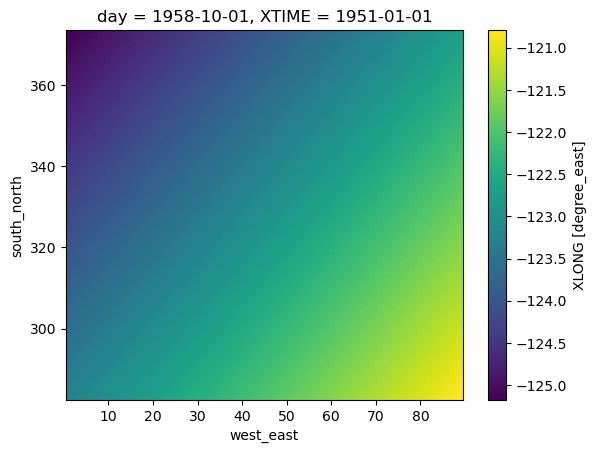

In [18]:
#write a function to find the [south_north, east_west] coorinates closest to a given [lat, long] using the XLAT 
#and XLONG dimension
outputfile=output1.sel(day="1958-10-01") #the WRF output file with XLAT and XLONG, slice a single time point to avoid carrying all that around
ll=[37.985278, -122.967778] #input coordinate, lat long in decimal format, long should be negative in western hemisphere 
#first find gridpoints within threshold of lat and long values 
thresh = 1.0
#create masks
min_lon=ll[1]-thresh
max_lon=ll[1]+thresh
min_lat=ll[0]-thresh
max_lat=ll[0]+thresh

mask_lon = (outputfile.XLONG >= min_lon) & (outputfile.XLONG <= max_lon)
mask_lat = (outputfile.XLAT >= min_lat) & (outputfile.XLAT <= max_lat)

output_trim=outputfile.where(mask_lon & mask_lat, drop=True)

output_trim['XLONG'].plot();


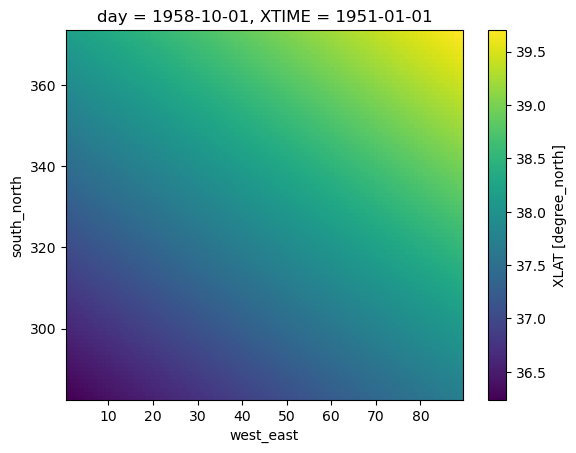

In [19]:
output_trim['XLAT'].plot();

In [20]:
print(min_lon)
print(max_lon)
print(min_lat)
print(max_lat)

-123.967778
-121.967778
36.985278
38.985278


In [21]:
np.array(output_trim.XLONG[2,4])

array(-123.15114, dtype=float32)

In [22]:
np.array([np.array(output_trim.XLAT[2,4]).item(), np.array(output_trim.XLONG[2,4]).item()])

array([  36.35006332, -123.15113831])

In [23]:
np.concatenate(([np.array(output_trim.XLAT[2,4])], [np.array(output_trim.XLONG[2,4])]),axis=0)

array([  36.350063, -123.15114 ], dtype=float32)

In [24]:
test=np.zeros_like(np.array(output_trim.west_east))
output_trim.assign_coords({"dist":test})

<xarray.Dataset> Size: 99kB
Dimensions:      (south_north: 91, west_east: 89, dist: 89)
Coordinates:
    day          datetime64[ns] 8B 1958-10-01
  * west_east    (west_east) int64 712B 1 2 3 4 5 6 7 8 ... 83 84 85 86 87 88 89
  * south_north  (south_north) int64 728B 283 284 285 286 ... 370 371 372 373
    XLONG        (south_north, west_east) float32 32kB -123.2 -123.2 ... -122.7
    XTIME        datetime64[ns] 8B 1951-01-01
    XLAT         (south_north, west_east) float32 32kB 36.24 36.26 ... 39.7
  * dist         (dist) int64 712B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Data variables:
    RNFRATE      (south_north, west_east) float32 32kB nan nan nan ... nan nan

In [25]:
empty=np.zeros_like(np.array(output_trim.XLONG))
empty[1,1]=7
print(empty)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 7. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
output_trim

<xarray.Dataset> Size: 99kB
Dimensions:      (south_north: 91, west_east: 89)
Coordinates:
    day          datetime64[ns] 8B 1958-10-01
  * west_east    (west_east) int64 712B 1 2 3 4 5 6 7 8 ... 83 84 85 86 87 88 89
  * south_north  (south_north) int64 728B 283 284 285 286 ... 370 371 372 373
    XLONG        (south_north, west_east) float32 32kB -123.2 -123.2 ... -122.7
    XTIME        datetime64[ns] 8B 1951-01-01
    XLAT         (south_north, west_east) float32 32kB 36.24 36.26 ... 39.7
Data variables:
    RNFRATE      (south_north, west_east) float32 32kB nan nan nan ... nan nan

In [27]:
output_trim.XLAT.sel(south_north=293,west_east=1)

<xarray.DataArray 'XLAT' ()> Size: 4B
array(36.45556, dtype=float32)
Coordinates:
    day          datetime64[ns] 8B 1958-10-01
    west_east    int64 8B 1
    south_north  int64 8B 293
    XLONG        float32 4B -123.4
    XTIME        datetime64[ns] 8B 1951-01-01
    XLAT         float32 4B 36.46
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [28]:
#Now calculate the distance for each [west_east, south_north] point's corresponding [XLAT, XLONG] to the point ll
#using the distance formula:  sqrt( (x2 - x1)**2 + (y2 - y1)**2 )

#initialize array to store distances
distarray= np.zeros_like(np.array(output_trim.XLONG))
#output_trim=output_trim.assign_coords({"dist":np.zeros_like(np.array(output_trim.west_east))})
jcount=0
icount=0

for j in output_trim.west_east:
    for i in output_trim.south_north: #south_north is the first index in the way XLONG and LAT are defined
        pairll=np.concatenate(([np.array(output_trim.XLAT.sel(south_north=i,west_east=j))], [np.array(output_trim.XLONG.sel(south_north=i,west_east=j))]),axis=0)
        #compute distance
        distarray[icount,jcount]=np.sqrt((pairll[0]-ll[0])**2 + (pairll[1]-ll[1])**2)
        icount=icount+1
    icount=0    
    jcount=jcount+1
    





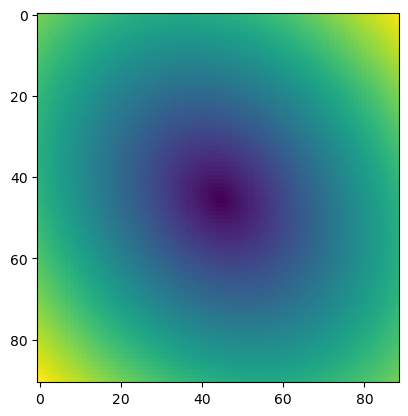

In [57]:
plt.imshow(distarray)
plt.show()

In [37]:
print(np.argmin(distarray,axis=1))
print(np.argmin(distarray,axis=0)) 
print(np.unravel_index(np.argmin(distarray,axis=None),distarray.shape))
print(distarray.min())

[35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39 39 39 39 40 40
 40 40 40 41 41 41 41 41 42 42 42 42 43 43 43 43 43 44 44 44 44 44 45 45
 45 45 46 46 46 46 46 47 47 47 47 48 48 48 48 48 49 49 49 49 49 50 50 50
 50 51 51 51 51 51 52 52 52 52 53 53 53 53 54 54 54 54 54]
[35 35 35 36 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39 40 40 40 40
 40 41 41 41 41 42 42 42 42 43 43 43 43 44 44 44 44 45 45 45 45 45 46 46
 46 46 47 47 47 47 48 48 48 48 49 49 49 49 50 50 50 50 51 51 51 51 52 52
 52 52 53 53 53 53 54 54 54 54 55 55 55 55 55 56 56]
(45, 44)
0.019002939


In [40]:
mindist=distarray[45,44]

In [47]:
mindist

0.019002939

In [39]:
#add distance as a coordinate so we can easily extract the coordinates associated with minimum distance
output_trim=output_trim.assign_coords({"dist":(("south_north","west_east"),distarray)})
print(output_trim.dist.min())
print(output_trim.dist.argmin(dim=("south_north","west_east")))
#print(output1.XLONG[output_trim.dist.idxmin(dims=("south_north","west_east"))]

<xarray.DataArray 'dist' ()> Size: 4B
array(0.01900294, dtype=float32)
Coordinates:
    day      datetime64[ns] 8B 1958-10-01
    XTIME    datetime64[ns] 8B 1951-01-01
{'south_north': <xarray.DataArray 'dist' ()> Size: 8B
array(45)
Coordinates:
    day      datetime64[ns] 8B 1958-10-01
    XTIME    datetime64[ns] 8B 1951-01-01, 'west_east': <xarray.DataArray 'dist' ()> Size: 8B
array(44)
Coordinates:
    day      datetime64[ns] 8B 1958-10-01
    XTIME    datetime64[ns] 8B 1951-01-01}


In [54]:
output1.sel(XLONG=-121, XLAT=37, method='nearest')

KeyError: "no index found for coordinate 'XLONG'"

In [55]:
#try mask, need the drop=true to avoid pulling too many values
output_trim.where(output_trim.dist==mindist,drop=True)

<xarray.Dataset> Size: 48B
Dimensions:      (south_north: 1, west_east: 1)
Coordinates:
    day          datetime64[ns] 8B 1958-10-01
  * west_east    (west_east) int64 8B 45
  * south_north  (south_north) int64 8B 328
    XLONG        (south_north, west_east) float32 4B -123.0
    XTIME        datetime64[ns] 8B 1951-01-01
    XLAT         (south_north, west_east) float32 4B 37.97
    dist         (south_north, west_east) float32 4B 0.019
Data variables:
    RNFRATE      (south_north, west_east) float32 4B 0.0

In [59]:
###Try somethibg else https://docs.xarray.dev/en/latest/generated/xarray.DataArray.set_xindex.html
test=output1.set_xindex(['XLONG','XLAT'])
test

ValueError: PandasMultiIndex only accepts 1-dimensional variables

In [ ]:
output_trim.XLONG.sel(south_north=91, west_east=89

In [31]:
output1.XLONG.sel(south_north=45, west_east=44)

<xarray.DataArray 'XLONG' ()> Size: 4B
array(-117.44623, dtype=float32)
Coordinates:
    west_east    int64 8B 44
    south_north  int64 8B 45
    XLONG        float32 4B -117.4
    XTIME        datetime64[ns] 8B ...
    XLAT         float32 4B 31.66
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:

In [36]:
# np.array(output1.lat2d)

In [37]:
# output2=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/auxhist_d01_2014-09-01_00_00_00")
# output2

In [38]:
#test1.assign_coords("lat"=test1.)

In [39]:
pt_reyes=[37.985278, 122.967778]

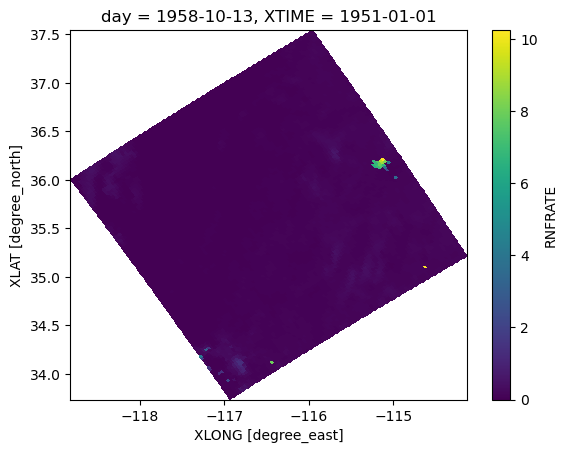

In [40]:
output1['RNFRATE'][12,100:200,100:200].plot(x='XLONG', y='XLAT')

In [41]:
output1.loc[dict(XLAT=slice(pt_reyes[0]))]

KeyError: "no index found for coordinate 'XLAT'"

In [ ]:
#need to set XLONG and XLAt as indices
output1fixed=output1.set_index(west_east="XLONG",south_north="XLAT")
output1fixed

In [ ]:
#need to set XLONG and XLAt as indices
output1fixed=output1.set_index(lon="XLONG",lat="XLAT")
output1fixed

In [ ]:
output1.sel(XLONG=pt_reyes[0],XLAT=pt_reyes[1],method="nearest").RNFRATE

In [ ]:
output1.sel(west_east=1,south_north=1,method="nearest").RNFRATE

In [ ]:
# test1.sel(south_north=pt_reyes[0],west_east=pt_reyes[1],method='nearest').prec